In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import learning_curve

print("*************IMPORTING REQUIRED FUNCTIONS AND MODULES****************")

*************IMPORTING REQUIRED FUNCTIONS AND MODULES****************


### Data Reading and Annotation

In [2]:
col = ['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8', 'label']

In [3]:
dataset_pen_train = pd.read_csv('pendigits.tra', sep= ',', header=None, names= col)

In [4]:
dataset_pen_test = pd.read_csv('pendigits.tes', sep= ',', header=None , names = col)

In [5]:
col1 = ['label']+[str(i) for i in range(784)]

In [6]:
dataset_mnist_train = pd.read_csv('mnist_train.csv',header=0, names= col1)


In [7]:
dataset_mnist_test = pd.read_csv('mnist_test.csv', header=0, names= col1)

### Appending Training and Testing Datasets 


In [8]:
dataset_mnist = dataset_mnist_train.append(dataset_mnist_test)

In [9]:
dataset_pen = dataset_pen_train.append(dataset_pen_test)

### Performing Exploratory Data Analysis

In [10]:
dataset_pen.shape , dataset_pen.size

((10992, 17), 186864)

In [11]:
dataset_pen.columns

Index(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6',
       'x7', 'y7', 'x8', 'y8', 'label'],
      dtype='object')

In [12]:
dataset_pen['label'].count()

10992

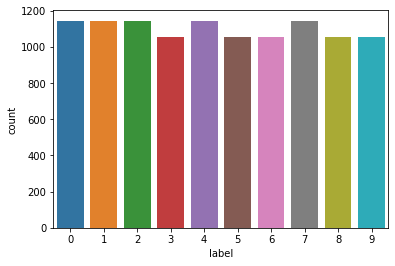

In [13]:
sns.countplot(dataset_pen['label'])

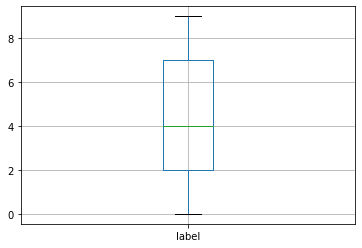

In [14]:
dataset_pen.boxplot(column= 'label')

In [15]:
dataset_pen.describe()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,38.814320,85.120269,40.605622,83.774199,49.770378,65.573144,51.220251,44.498999,56.868541,33.695961,60.516376,34.826510,55.022289,34.937045,47.287482,28.845342,4.431587
std,34.257783,16.218571,26.342984,19.163646,34.100515,26.996688,30.576881,29.906104,34.135530,27.251548,37.288086,27.119982,22.335539,33.155463,41.760400,35.778094,2.876947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,76.000000,20.000000,72.000000,18.000000,49.000000,28.000000,23.000000,29.000000,7.000000,23.000000,11.000000,42.000000,5.000000,0.000000,0.000000,2.000000
50%,32.000000,89.000000,40.000000,91.000000,53.000000,71.000000,53.500000,43.000000,60.000000,33.000000,73.000000,30.000000,53.000000,27.000000,40.000000,9.000000,4.000000
75%,65.000000,100.000000,58.000000,100.000000,78.000000,86.000000,74.000000,64.000000,89.000000,54.000000,97.000000,55.000000,68.000000,47.000000,100.000000,51.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


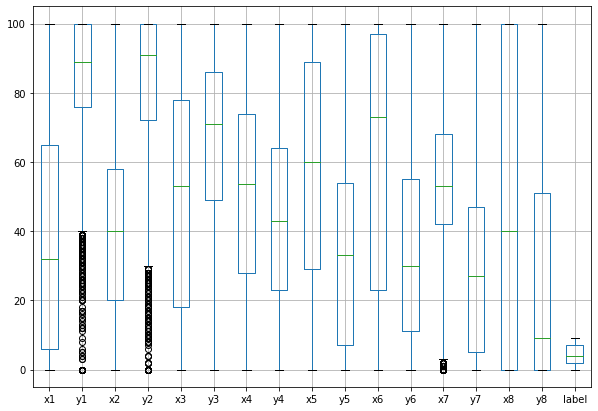

In [16]:
dataset_pen.boxplot(figsize= (10,7))

In [17]:
dataset_pen.isnull().sum() 

x1       0
y1       0
x2       0
y2       0
x3       0
y3       0
x4       0
y4       0
x5       0
y5       0
x6       0
y6       0
x7       0
y7       0
x8       0
y8       0
label    0
dtype: int64

### Finding Relationship Between Variables for Feature Selection if required

In [18]:
corr = dataset_pen.corr().abs()
corr = corr.unstack()
corr = corr.sort_values(kind="quicksort", ascending = False)

In [19]:
corr = corr[corr < 1.0]
corr = corr.drop_duplicates()

In [20]:
print(corr.head(1))     #Maximum Correlation
print(corr.tail(1))     #Minimum Correlation

y7  y8    0.857205
dtype: float64
x8  x7    0.000832
dtype: float64


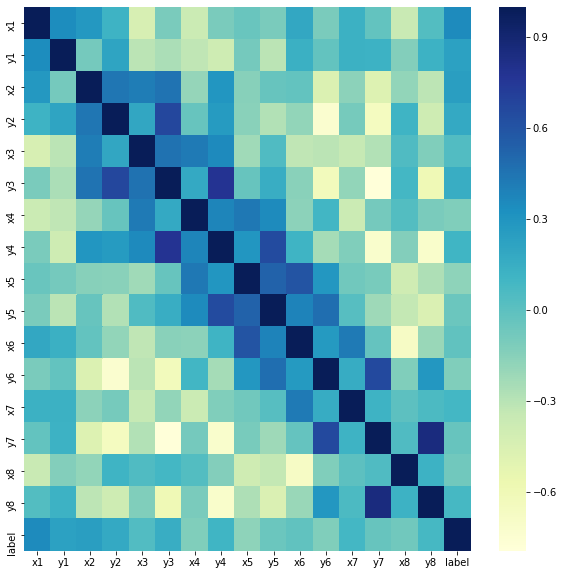

In [21]:
heat = dataset_pen.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heat , ax=ax, cmap="YlGnBu")



## Perfoming Data Mining

In [22]:
X = dataset_pen.values[:,:-1]
y = dataset_pen.values[:,-1]

In [23]:
X.shape , y.shape

((10992, 16), (10992,))

### Plotting the Pen Digit Numbers

In [24]:
np.random.seed(1)
random_numbers = [np.random.randint(0,1000,10)]

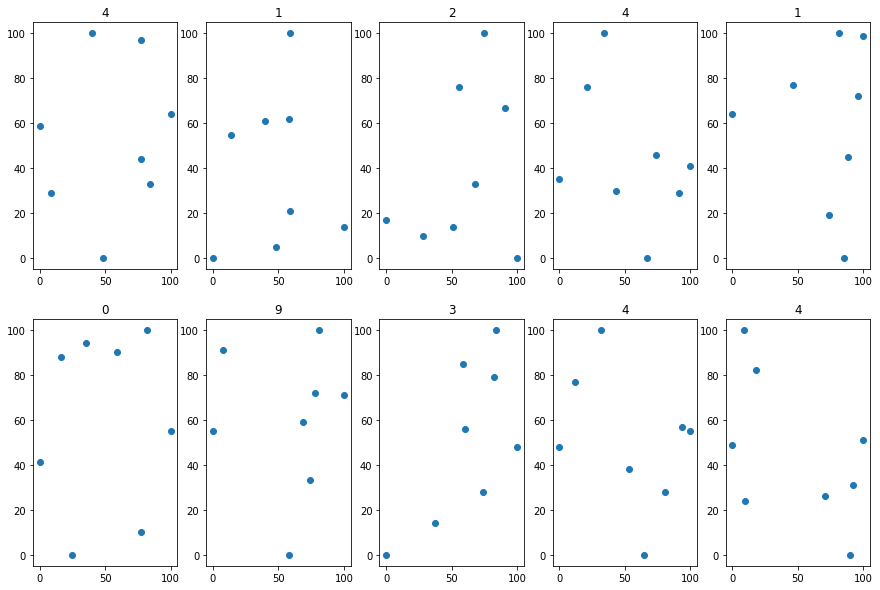

In [25]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    r,c = [X[random_numbers[0][i]][x] for x in range(0,16,2)],[X[random_numbers[0][i]][x] for x in range(1,16,2)]
    plt.scatter(r,c)
    plt.title(y[random_numbers[0][i]])

### Decision Tree using GridSearchCV and RandomizedSearchCV

In [30]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        a = np.flatnonzero(results['rank_test_score'] == i)
        for j in a:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][j],
                  results['std_test_score'][j]))
            print("Parameters: {0}".format(results['params'][j]))

In [31]:
classifier = DecisionTreeClassifier()
max_depth = [int(x) for x in np.linspace(1, 21, num = 20)]
parameters = {
                'max_depth': max_depth,
                "random_state":[100,None],
                "presort": [True, False],
                "class_weight":[ "balanced" , None],
                "criterion": ["gini", "entropy"]}

random_search = RandomizedSearchCV(classifier,param_distributions=parameters
                                   ,n_iter=320 , cv=5 , n_jobs=-2)

n_iter_search = 320
start = time()
random_search.fit(X, y)
print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

bestparameters = report(random_search.cv_results_, 3)
print(bestparameters)


RandomizedSearchCV took 168.24 seconds for 320 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.962 (std: 0.004)
Parameters: {'random_state': None, 'presort': False, 'max_depth': 14, 'criterion': 'entropy', 'class_weight': None}
Model with rank: 2
Mean validation score: 0.961 (std: 0.002)
Parameters: {'random_state': None, 'presort': True, 'max_depth': 13, 'criterion': 'entropy', 'class_weight': None}
Model with rank: 3
Mean validation score: 0.960 (std: 0.002)
Parameters: {'random_state': None, 'presort': False, 'max_depth': 19, 'criterion': 'entropy', 'class_weight': None}
None


In [32]:
classifier = DecisionTreeClassifier()
max_depth = [int(x) for x in np.linspace(1, 21, num = 20)]
parameters = {
                'max_depth': max_depth,
                "random_state":[100,None],
                "presort": [True, False],
                "class_weight":[ "balanced" , None],
                "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(classifier,param_grid=parameters, cv=5 , n_jobs = -2)

start = time()
grid_search.fit(X, y)
print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.cv_results_)))

best_parameter = report(grid_search.cv_results_, 3)
print(best_parameter)


GridSearchCV took 23.89 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.961 (std: 0.003)
Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 18, 'presort': False, 'random_state': None}
Model with rank: 2
Mean validation score: 0.961 (std: 0.004)
Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 17, 'presort': True, 'random_state': None}
Model with rank: 3
Mean validation score: 0.961 (std: 0.004)
Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 21, 'presort': True, 'random_state': None}
None


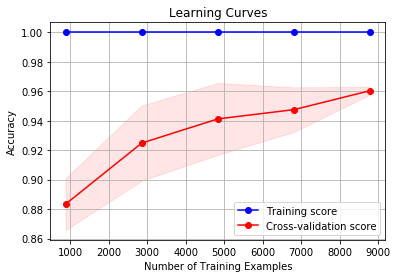

In [33]:
classifier = DecisionTreeClassifier(max_depth= 18, criterion='entropy', presort=True, random_state=None, class_weight=None)
plt.figure()
plt.title("Learning Curves")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.legend(loc="best")

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [36]:
train_error, test_error = [],[]
for depth_limit in range(1, 21):
   
    classifier = DecisionTreeClassifier(max_depth= depth_limit, criterion='entropy', presort = True, random_state= None
                                       , class_weight= None)
    classifier.fit(X, y)
    train_error.append(1-classifier.score(X_train, y_train))
    test_error.append(1-np.mean(cross_val_score(classifier, X, y, cv=3)))

Text(0, 0.5, 'Err')

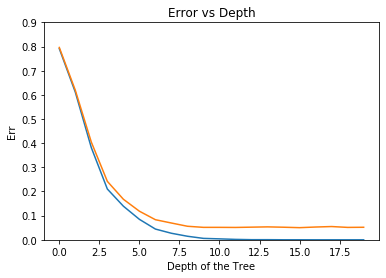

In [37]:
plt.figure()
plt.plot(train_error, label="Training Error")
plt.plot(test_error, label="Cross Validation Error")
plt.ylim([0, 0.9])
plt.title("Error vs Depth")
plt.xlabel("Depth of the Tree")
plt.ylabel("Err")

### Normalization
    

In [38]:
X_normalized = preprocessing.normalize(X, norm='l2')

### Using GridSearchCV for finding the best hyper parameters for the Normalized Data

In [39]:
classifier = DecisionTreeClassifier()
max_depth = [int(x) for x in np.linspace(1, 21, num = 20)]
parameters = {
                'max_depth': max_depth,
                "random_state":[100,None],
                "presort": [True, False],
                "class_weight":[ "balanced" , None],
                "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(classifier,param_grid=parameters, cv=5 , n_jobs= -2)

start = time()
grid_search.fit(X_normalized, y)
print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.cv_results_)))

best_parameter = report(grid_search.cv_results_, 3)
print(best_parameter)


GridSearchCV took 70.82 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.963 (std: 0.002)
Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 16, 'presort': False, 'random_state': None}
Model with rank: 2
Mean validation score: 0.963 (std: 0.004)
Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 19, 'presort': False, 'random_state': None}
Model with rank: 3
Mean validation score: 0.963 (std: 0.003)
Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 18, 'presort': True, 'random_state': None}
None


### Performing Dimensionality Reduction on the Normalized Data, to see if it improves our accuracy

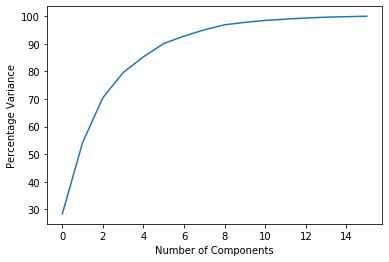

In [40]:
pca = PCA().fit(X_normalized)
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Percentage Variance');

In [41]:
pca = PCA(n_components=12).fit(X_normalized)
X_pca_normalized = pca.transform(X_normalized)

In [42]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca_normalized, y, test_size=0.30)

In [43]:
classifier = DecisionTreeClassifier(max_depth= 18, criterion='entropy', presort = False, random_state= None
                                       , class_weight= None)
classifier.fit(X_pca_train, y_pca_train)
y_pred = classifier.predict(X_pca_test)
accuracy_score(y_pred,y_pca_test)

0.9484536082474226

## Our Final Classifier:

In [44]:
classifier = DecisionTreeClassifier(max_depth= 18, criterion='entropy', presort = False, random_state= None
                                       , class_weight= None)
classifier.fit(X_normalized,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=18,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Now working on the MNIST Dataset

### First we sample 50 instances of each label

In [69]:
np.random.seed(1)
dataset_sampled_mnist = pd.DataFrame(columns=col1, dtype='int64')
for i in range(10):
    samples = dataset_mnist[dataset_mnist.label==i].sample(50, replace=False)
    dataset_sampled_mnist = pd.concat([dataset_sampled_mnist, samples], ignore_index=True)

In [70]:
X_mnist = dataset_sampled_mnist[col1[1:]]
y_mnist = dataset_sampled_mnist[col1[0]]

In [71]:
X_mnist = X_mnist.values[:] 
X_mnist = X_mnist.reshape(-1,28,28)

### Perfoming Image Processing and Visualization on the MNIST data

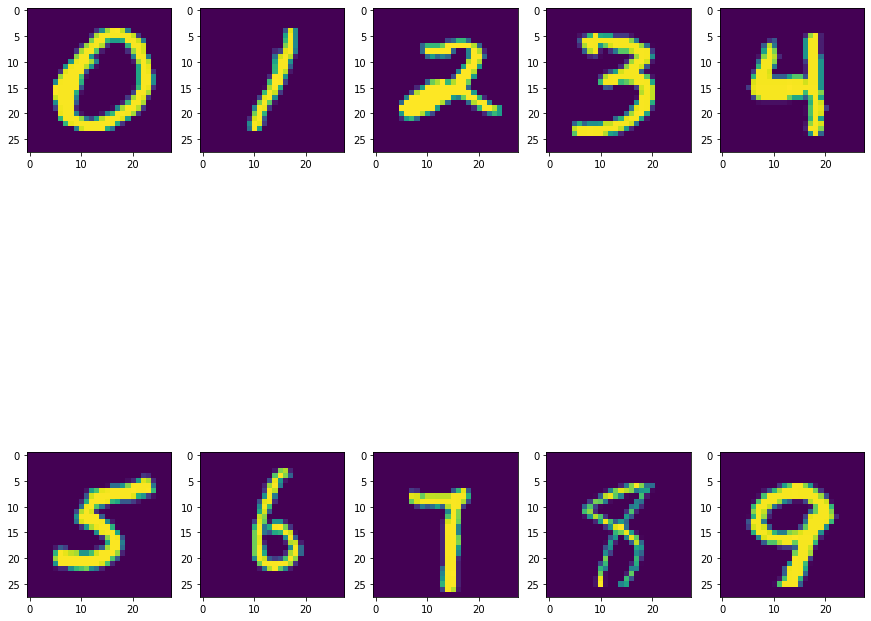

In [72]:
a = 0
plt.figure(figsize=(15,15))
for i in range(0,500,50):
    a = a + 1
    plt.subplot(2,5,a)
    plt.imshow(X_mnist[i])
    

In [73]:
coord_list = []
i1,j1 = 0,0
for x in range(500):
    num_coords = []
    for i in range(28):
        for j in range(28):
            if(X_mnist[x][i][j] > 235):
                j1 = int(j*100/28)
                i1 = int((28-i)*100/28)
                num_coords.append((j1, i1))
    coord_list.append(num_coords)

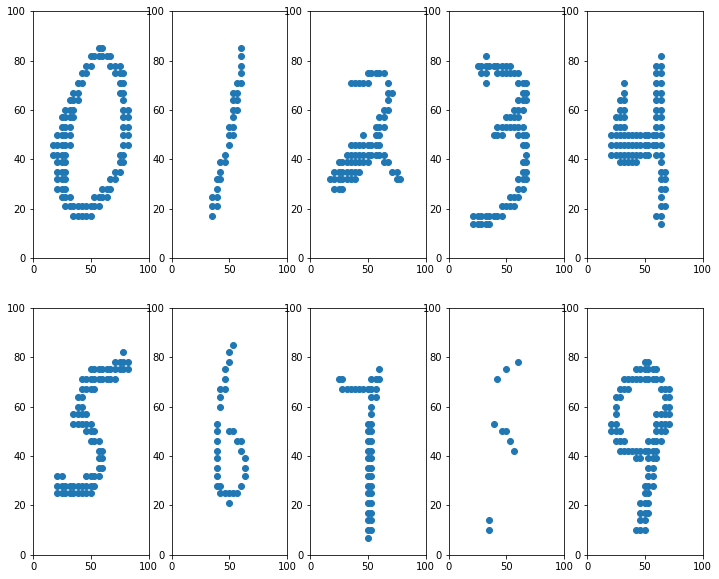

In [74]:
a = 0
plt.figure(figsize=(12,10))
for i in range(0,500,50):
    a = a + 1
    plt.subplot(2,5,a)
    x,y = zip(*coord_list[i])
    x,y = np.array(x), np.array(y)
    plt.scatter(x,y)
    plt.xlim((0,100))
    plt.ylim((0,100))
    

## Using K-Means Clustering to find the Cluster Centres of all the Samples

In [75]:
np.random.seed(1)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,max_iter=300)

In [76]:
np.random.seed(1)
final_eight_coords = []
for i in range(500):
    kmeans.fit(coord_list[i])
    final_eight_coords.append(kmeans.cluster_centers_)

### Plotting The Final 8 Co-ordinates and Creating a Dataframe

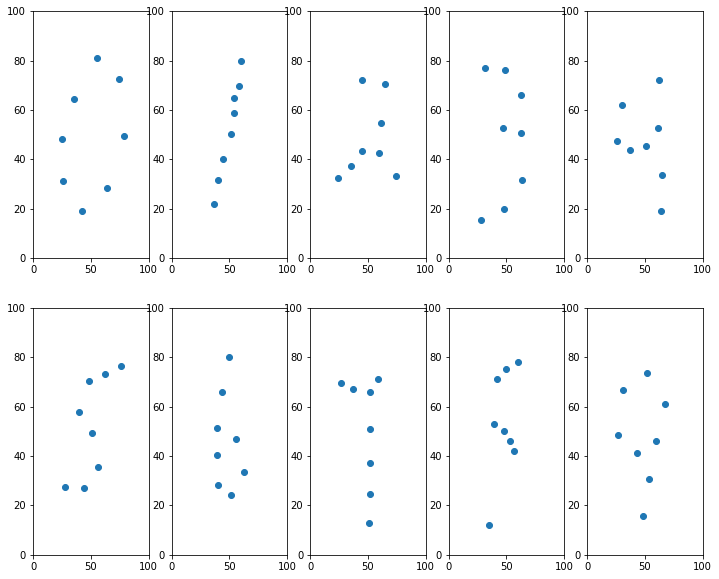

In [77]:
a = 0
plt.figure(figsize=(12,10))
for i in range(0,500,50):
    a = a + 1
    plt.subplot(2,5,a)
    x,y = zip(*final_eight_coords[i])
    x,y = np.array(x), np.array(y)
    plt.scatter(x,y)
    plt.xlim((0,100))
    plt.ylim((0,100))
    

In [78]:
final_eight_coords = np.stack(final_eight_coords)
final_eight_coords = final_eight_coords.astype(int)

In [79]:
x,y = [],[]
for q in range(500):
    for i in range(0,8):
            x.append(final_eight_coords[q][i][0])
            y.append(final_eight_coords[q][i][1])

In [80]:
len(x), len(y)

(4000, 4000)

In [81]:
x1= x[:4000:8]
x2= x[1:4000:8]
x3= x[2:4000:8]
x4= x[3:4000:8]
x5= x[4:4000:8]
x6= x[5:4000:8]
x7= x[6:4000:8]
x8= x[7:4000:8]

In [82]:
y1= y[:4000:8]
y2= y[1:4000:8]
y3= y[2:4000:8]
y4= y[3:4000:8]
y5= y[4:4000:8]
y6= y[5:4000:8]
y7= y[6:4000:8]
y8= y[7:4000:8]

In [83]:
data_mnist = pd.DataFrame(data=[x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8]).transpose()
data_mnist.columns = ['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8']

In [84]:
data_mnist.head(3)

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
0,63,28,25,48,55,81,79,49,42,19,35,64,25,31,74,72
1,39,22,60,77,40,56,59,44,50,81,64,60,37,37,54,30
2,64,41,26,25,69,79,39,58,72,57,46,29,55,71,23,44


In [85]:
X_mnist_test = data_mnist.values
X_mnist_test = preprocessing.normalize(X_mnist_test, norm= 'l2')

In [86]:
X_mnist_test

array([[0.29501806, 0.13111914, 0.11707066, ..., 0.14516762, 0.34652915,
        0.3371635 ],
       [0.18385185, 0.1037113 , 0.282849  , ..., 0.17442355, 0.2545641 ,
        0.1414245 ],
       [0.30208177, 0.19352114, 0.12272072, ..., 0.33512197, 0.10856064,
        0.20768122],
       ...,
       [0.17265487, 0.06906195, 0.25158281, ..., 0.24664982, 0.22691783,
        0.14798989],
       [0.26172381, 0.36165472, 0.18558598, ..., 0.36165472, 0.25220658,
        0.19510321],
       [0.2066835 , 0.3297094 , 0.28049904, ..., 0.29034111, 0.25097283,
        0.12794693]])